# What makes a high rating score on IMDb?  - COGS 108 Final Project

## TEAM NAME:  
Team MRP - Movie Rating Predictors

## TEAM MEMBERS: 
Shuibenyang Yuan A14031016<br>
Meliza Ramos Suarez A12604036<br>
Sutianyi Wen A13992949<br>
Froilan Grepo A15714684<br>
Cristina Ahamad A13869848<br>

# 1 Introduction

## 1.1 DATA SCIENCE QUESTION(S): 
According to the data from “The statistic Portal”, the global box office revenue will reach 50 billion U.S. dollar in 2020 and 19% Americans go to movie theatres once a month. Because of the film industry's prosperity in recent years, there are nearly 2000 movies made worldwide each year. As a group of movie fans, we usually find that there are many boring movies existing in the market and we often need to check the IMDb rating score before buying the ticket. After looking into the data set found on the Imdb website, we noticed that each movie has 28 features including. So we are curious about which top 5 features are most related to a high Imdb score? 

Before actually starting process the data set, we made several assumptions based on our experience of watching a movie and search “what kind of movies are more likely to have high Imdb score ” online. The popularity of the movie director, poster color, advertisement budgeting, production budget and movie genre might be the top5 important feature. 

## 1.2 Hypothesis: (will be change based on features)
After the first meeting, we came up with some factors that may influence movie ratings.<br>
### The director of the movie<br>
    -The more famous the director is, the higher the rating will be<br>
    -The larger number of the directors is, the higher the rating will be<br>
    -The more experienced the director is, the higher the rating will be<br>
### The color of the poster<br>
    -The movies with light colors on posters are more likely to have a higher rating score than those with dark colors on posters.<br>
### Advertisement strategies<br>
    -How do producers advertise their movies will affect the rating score.<br>
    -High exposure to media online tend to lead a rating score.<br>
### The budget of the movie<br>
    -The higher the budget is, the higher the rating score will be.<br>
### The genre of the movie<br>
    -Sci-fi movies are more likely to have higher ratings than Romance movies.<br>


## 1.3 Background:
The dataset that we will be examining for this project consists of a collection of thousands of movies over a span of 100 years from 66 different countries. The data collected from these movies were used to determine how movie ratings are created through an abundant number of different ways such as social media, advertisement, the actors who are involved in the movie and many other things were analyzed as well. Through this dataset our group was able to analyze the different input that is taken from social media, advertisements, and all the different categories that are used to rate movies in order to come up with an overall rating for these movies.
 A similar project that our group found was “IMDB Exploratory Data Analysis Project” by Ilya Ezepov. Ezepov’s dataset project is very similar to the path our group has decided to take because Ezepov also explores movie ratings through a number of different categories but instead of figuring the exact movie rating through these categories, Ezepov takes a different approach of predicting movie ratings through movie characteristics and the overall production budget. Some of Ezepov’s findings consisted of sound and color being a huge hit in the movie industry, political and economical events impact the audience's movie choices, and economic events also impact the amount of views per movie. 
	In addition, another similar project that we found was “Movie Exploratory Analysis Using IMDB Datasets” by Yash Sharma. Sharma’s project explores the ideas of which country produces the most movies and what kind of movies are produced the most. Sharma’s project examines a similar dataset as the one our group has decided to analyze but takes a different approach while analyzing it. Some of the insights that Sharma was able to collect through the dataset used for his project consisted of Drama, Comedy, and Thriller are the top genres and that the US has the most thriving movie industry. Both of these projects are very similar to the approach our group has decided to take and can be a great resource for the creation of our final project. 
    
    References Link:
IMDB Exploratory Data Analysis Project - Ilya Ezepov:
http://rstudio-pubs-static.s3.amazonaws.com/52740_40aabe898b7a46b99c2b3f4ca3042e8a.html
Movie Exploratory Analysis Using IMDB Datasets - Yash Sharma: 
https://rpubs.com/yash91sharma/dw_project_ys



## 1.4 ETHICAL CONSIDERATIONS: 
### Permission to the dataset:
The dataset we will use is allowed for public access, meaning no necessary permission is needed. The dataset is from data.world which is an open source dataset website. The dataset is provided by Chuan Sun who scraped tons of metadata using a combination of www.the-numbers.com, IMDB.com, and a Python library called "scrapy". 
### Privacy Concern: 
Although the dataset we use is completely public, we still have our privacy concerns regarding our dataset. For instance, the dataset reveals 2399 unique director names, thousands of actors/actresses and the number of likes on their Facebooks. In this case, we decide to comply with the Safe Harbor Method and anonymize our dataset.
### Potential Biases:
One of the potential biases of the dataset is the countries of the movies. Since the dataset only contains the information of about 66 countries, it can only apply to the IMDB score over those countries. Another potential bias is that among 47 distinct languages used in these films, English dominates other languages in terms of use, there is a possibility that majority of the critics and user base consist of "Westerners". The IMDB score itself can only represent the rating of movies with English-speaking users. The number of critics who rate the movie can also affect the IMDB score since each movies are reviewed by a different number of people.
### Bias Considertation:
There might be dataset bias since all the datasets are collected from Imdb’s official website. The 
scores of movies only reflects the Imdb users’ likeness but can’t be used to represent everyone’s 
opinion toward each movie.
Moreover, the dataset might not be big enough to draw a solid conclusion about what 5 features 
are most important to a high Imdb Score.

# 2 Data Exploration

## 2.1 Data Description:
Dataset Name: IMDB 5000 Movie Dataset<br>
Dataset Link: https://data.world/popculture/imdb-5000-movie-dataset<br>
Number of Observations: 5043<br>
Number of Features: 29<br>
Dataset Description:<br>
This dataset shows there are many influential factors towards the IMDB rating of each movie. With 29 variables and 5043 describing (almost) every aspect of IMDB rating of different movies spanning across 100 years and 66 countries. There are 2399 unique director names, and thousands of actors/actresses. 

## 2.2 Data Parsing

In [149]:
%matplotlib inline
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
# from scipy.stats import ttest_ind, chisquare, normaltest, norm
# from matplotlib.gridspec import GridSpec
# from sklearn.cluster import KMeans
# from scipy.cluster.vq import whiten

In [150]:
raw_data = pd.read_csv('movie_metadata.csv')

In [151]:
raw_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [152]:
data_column_type = pd.Series({'color' : 'categorical',
 'director_name': 'nominal',
 'num_critic_for_reviews' : 'numerical', 
 'duration': 'numerical',
'director_facebook_likes' : 'numerical', 
 'actor_3_facebook_likes': 'numerical',
 'actor_2_name': 'nominal',
'actor_1_facebook_likes': 'numerical',
 'gross': 'numerical',
 'genres':'categorical',
 'actor_1_name': 'nominal',
'movie_title': 'nominal',
 'num_voted_users': 'numerical',
 'cast_total_facebook_likes': 'numerical',
'actor_3_name': 'categorical',
 'facenumber_in_poster': 'numerical',
 'plot_keywords': 'nominal',
'movie_imdb_link': 'nominal', 
 'num_user_for_reviews': 'numerical', 
 'language' : 'categorical',
 'country': 'categorical',
'content_rating': 'ordinal',
 'budget': 'numerical', 
 'title_year': 'ordinal', 
 'actor_2_facebook_likes': 'numerical',
'imdb_score': 'ordinal', 
 'aspect_ratio' : 'categorical',
 'movie_facebook_likes' : 'numerical'}, name = 'type of data')

## 2.3 Data Type Summery

In [153]:
data_column_type.to_frame()

,type of data
color,categorical
director_name,nominal
num_critic_for_reviews,numerical
duration,numerical
director_facebook_likes,numerical
actor_3_facebook_likes,numerical
actor_2_name,nominal
actor_1_facebook_likes,numerical
gross,numerical
genres,categorical


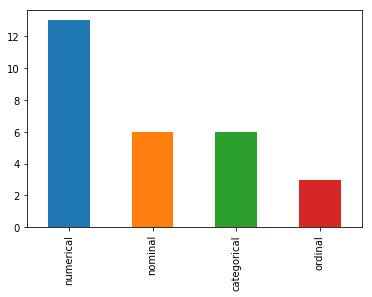

In [154]:
data_column_type.value_counts().plot(kind = 'bar')

TODO: word description over the plot

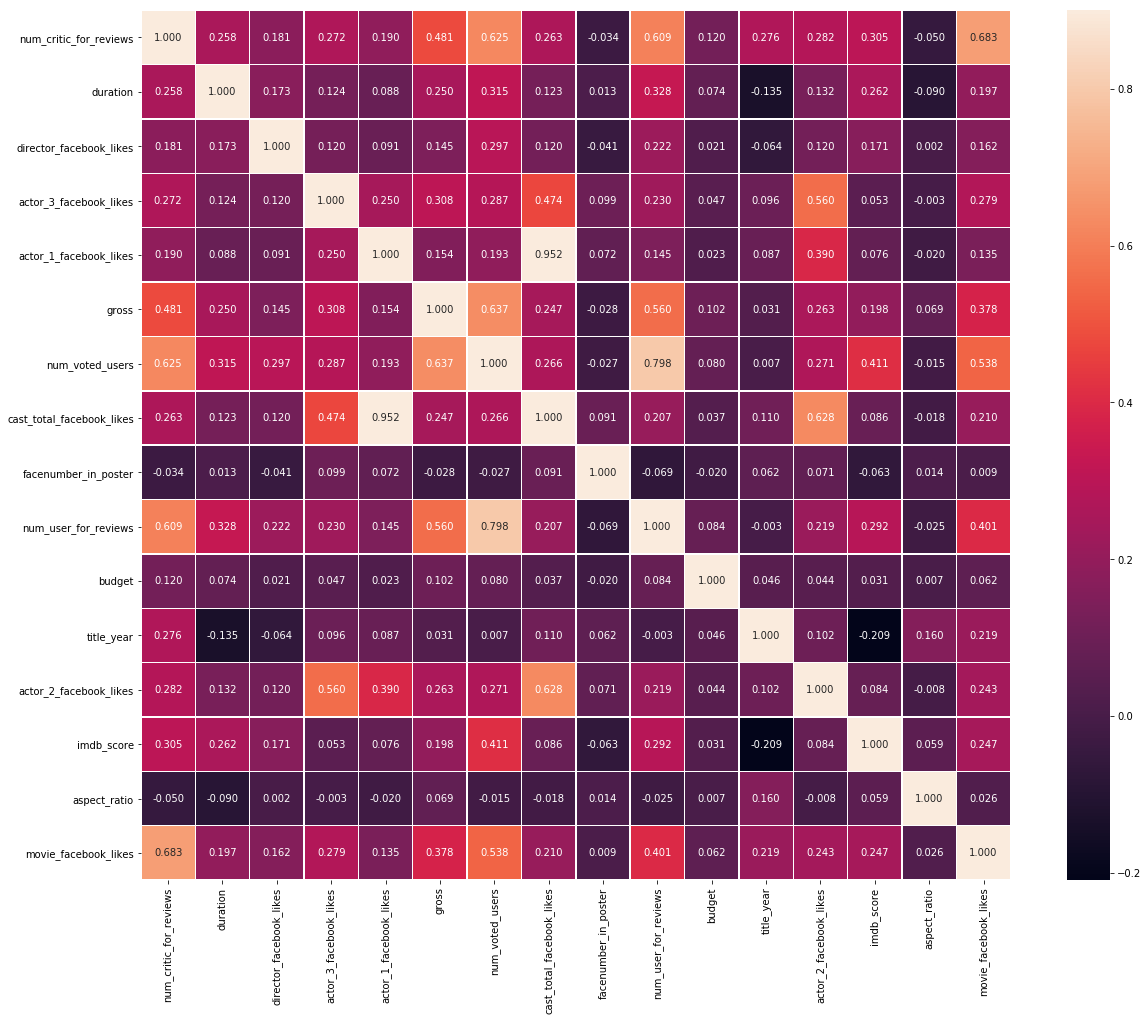

In [155]:
corr_map = raw_data.corr()
plt.subplots(figsize=(20,16))
sns.heatmap(corr_map, vmax=0.9, square=True, fmt = '.3f', annot = True, linewidths = .5)

Here, light color indicates high correlation, and dark color indicates low correlation. We can ignore the white diagonal line, because it's the correlation between the same variables, which must be 1.

TODO: word description over the plot

## 2.4 The Target Data
our target data is imdb_score

In [156]:
raw_data['imdb_score'].describe()

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

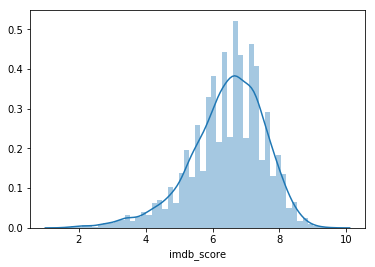

In [157]:
sns.distplot(raw_data['imdb_score'])

Frome the distribution, we can see the distribution of imdb_score rating is normally distributed but a little bit skewd to left.

# 3 Data Preprocessing

## 3.1 Handling Duplicates

In [158]:
raw_data.duplicated().sum()

45

There are 45 duplicated rows in the dataset, and we will drop them

In [159]:
data = raw_data.drop_duplicates()

## 3.2 Data preprocessing for numerical data
we will not consider the features with low correlation to imdb score based on heap map above

In [160]:
data_column_type[~data_column_type.isin(['categorical', 'nominal', 'ordinal'])]

num_critic_for_reviews       numerical
duration                     numerical
director_facebook_likes      numerical
actor_3_facebook_likes       numerical
actor_1_facebook_likes       numerical
gross                        numerical
num_voted_users              numerical
cast_total_facebook_likes    numerical
facenumber_in_poster         numerical
num_user_for_reviews         numerical
budget                       numerical
actor_2_facebook_likes       numerical
movie_facebook_likes         numerical
Name: type of data, dtype: object

We have gross and budget information. So let’s add two colums: profit and percentage return on investment for further analysis.

In [161]:
data['profit'] = data['gross'] - data['budget']

In [162]:
data['percentage_return'] = data['profit'] / data['budget']

## 3.3 Data preprocessing for categorical, nominal, ordinal data

In [163]:
non_numeric = data_column_type[data_column_type.isin(['categorical', 'nominal', 'ordinal'])]

In [164]:
non_numeric.index

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating', 'title_year', 'imdb_score',
       'aspect_ratio'],
      dtype='object')

In [165]:
data[non_numeric.index].nunique()

color                 2
director_name      2398
actor_2_name       3032
genres              914
actor_1_name       2097
movie_title        4917
actor_3_name       3521
plot_keywords      4760
movie_imdb_link    4919
language             47
country              65
content_rating       18
title_year           91
imdb_score           78
aspect_ratio         22
dtype: int64

### 3.3.1 Color, language, country, content_rating, aspect_ratio can be directly hot-encoded

we will hot encode columns in sklearn pipeline later on

In [166]:
hot_encoding_columns = ['color','language', 'country', 'aspect_ratio']

In [167]:
data[hot_encoding_columns].head()

,color,language,country,aspect_ratio
0,Color,English,USA,1.78
1,Color,English,USA,2.35
2,Color,English,UK,2.35
3,Color,English,USA,2.35
4,NaN,NaN,NaN,NaN


### 3.3.2 We Name columns

In [168]:
name_columns = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']

In [169]:
popularity = ['director_facebook_likes', 'actor_1_facebook_likes', \
              'actor_2_facebook_likes', 'actor_3_facebook_likes']

### 3.3.3 Special columns
Following columns need to be parsed into different word.

In [170]:
to_parse = ['plot_keywords', 'genres']
display(data[to_parse].head())

,plot_keywords,genres
0,avatar|future|marine|native|paraplegic,Action|Adventure|Fantasy|Sci-Fi
1,goddess|marriage ceremony|marriage proposal|pi...,Action|Adventure|Fantasy
2,bomb|espionage|sequel|spy|terrorist,Action|Adventure|Thriller
3,deception|imprisonment|lawlessness|police offi...,Action|Thriller
4,NaN,Documentary


We will use sklearn CountVectorizer to make transform them into matrix

In [171]:
from sklearn.feature_extraction.text import CountVectorizer

In [172]:
vector = CountVectorizer()

In [173]:
vector.fit_transform(data['plot_keywords'].str.replace('|', ',').fillna(' '))

<4998x6109 sparse matrix of type '<class 'numpy.int64'>'
	with 34503 stored elements in Compressed Sparse Row format>

In [174]:
vector.fit_transform(data['genres'].str.replace('|', ',').fillna(' '))

<4998x30 sparse matrix of type '<class 'numpy.int64'>'
	with 15002 stored elements in Compressed Sparse Row format>

For 'movie_title' column: we also will use countvectorizer to transform it into matrix

In [175]:
data['movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [176]:
vector.fit_transform(data['movie_title'].str.replace(' ',',').fillna(' '))

<4998x4775 sparse matrix of type '<class 'numpy.int64'>'
	with 13181 stored elements in Compressed Sparse Row format>

It will transform into matrix the count of word by word. Since they are large matrcies we will use directly preprocess in sklearn pipeline 

### 3.3.4 Sort out content rating

In [177]:
data['content_rating'].unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

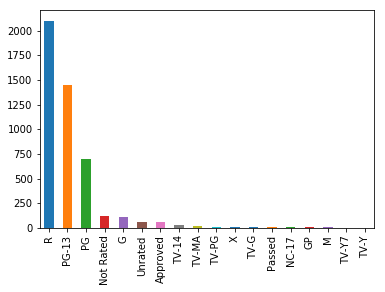

In [178]:
data['content_rating'].value_counts().plot(kind = 'bar')

TODO: word description over the plot

According to the history of naming these different content ratings, we find M = GP = PG, X = NC-17. We want to replace M and GP with PG, replace X with NC-17, because these two are what we use nowadays.

We transform TV rating to corresponding Film rating.

We want to replace “Approved”, “Not Rated”, “Passed”, “Unrated” with the most common rating “R”.

In [179]:
def filter_content_rating(x):
    if x == 'M' or x == 'GP' or x == 'TV-PG' or x == 'TV-Y7':
        return 'PG'
    elif x == 'N' or x == 'NC-17' or x == 'X' or x == 'TV-MA':
        return 'NC-17'
    elif x == 'Approved' or x == 'Not Rated' or x == 'Passed' or x == 'Unrated':
        return 'R'
    elif x == 'TV-G' or x == 'G' or x == 'TV-Y':
        return 'G'
    elif x == 'TV-14' or x == 'PG-13':
        return 'PG-13'
    else:
        return x

In [180]:
data['content_rating'] = data['content_rating'].apply(filter_content_rating)

In [181]:
data['content_rating'].value_counts()

R        2338
PG-13    1474
PG        723
G         123
NC-17      39
Name: content_rating, dtype: int64

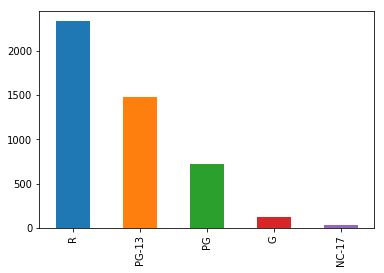

In [182]:
data['content_rating'].value_counts().plot(kind = 'bar')

TODO: word description over the plot

Then we only have five catogories for the content rating

### 3.3.5 Drop Unnecessary Columns
we found movie_imdb_link have no correlation with imdb score

In [183]:
data = data.drop('movie_imdb_link',axis =1 )

## 3.4 Transform target column: imdb_score


Since we will do classification rather than regression. We will divide movies in to five categories. With following segement:

$ 1: [0-2), 2: [2-4), 3:[4-6), 4:[6-8), 5:[8-10) $ 

In [184]:
def trans(x):
    if x<2:
        return 1
    elif x >= 2 and x < 4:
        return 2
    elif x >= 4 and x < 6:
        return 3
    elif x >= 6 and x < 8:
        return 4
    else:
        return 5

In [185]:
data['imdb_score_5'] = data['imdb_score'].apply(trans)

## 3.5 Null value
note that we have null value in our dataset, we need to elimunate the null values. <br>
to proceed this process, we will impute null value with different decision based on different features

In [186]:
data.isnull().mean()

color                        0.003802
director_name                0.020608
num_critic_for_reviews       0.009804
duration                     0.003001
director_facebook_likes      0.020608
actor_3_facebook_likes       0.004602
actor_2_name                 0.002601
actor_1_facebook_likes       0.001401
gross                        0.174870
genres                       0.000000
actor_1_name                 0.001401
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.004602
facenumber_in_poster         0.002601
plot_keywords                0.030412
num_user_for_reviews         0.004202
language                     0.002401
country                      0.001000
content_rating               0.060224
budget                       0.097439
title_year                   0.021409
actor_2_facebook_likes       0.002601
imdb_score                   0.000000
aspect_ratio                 0.065426
movie_facebo

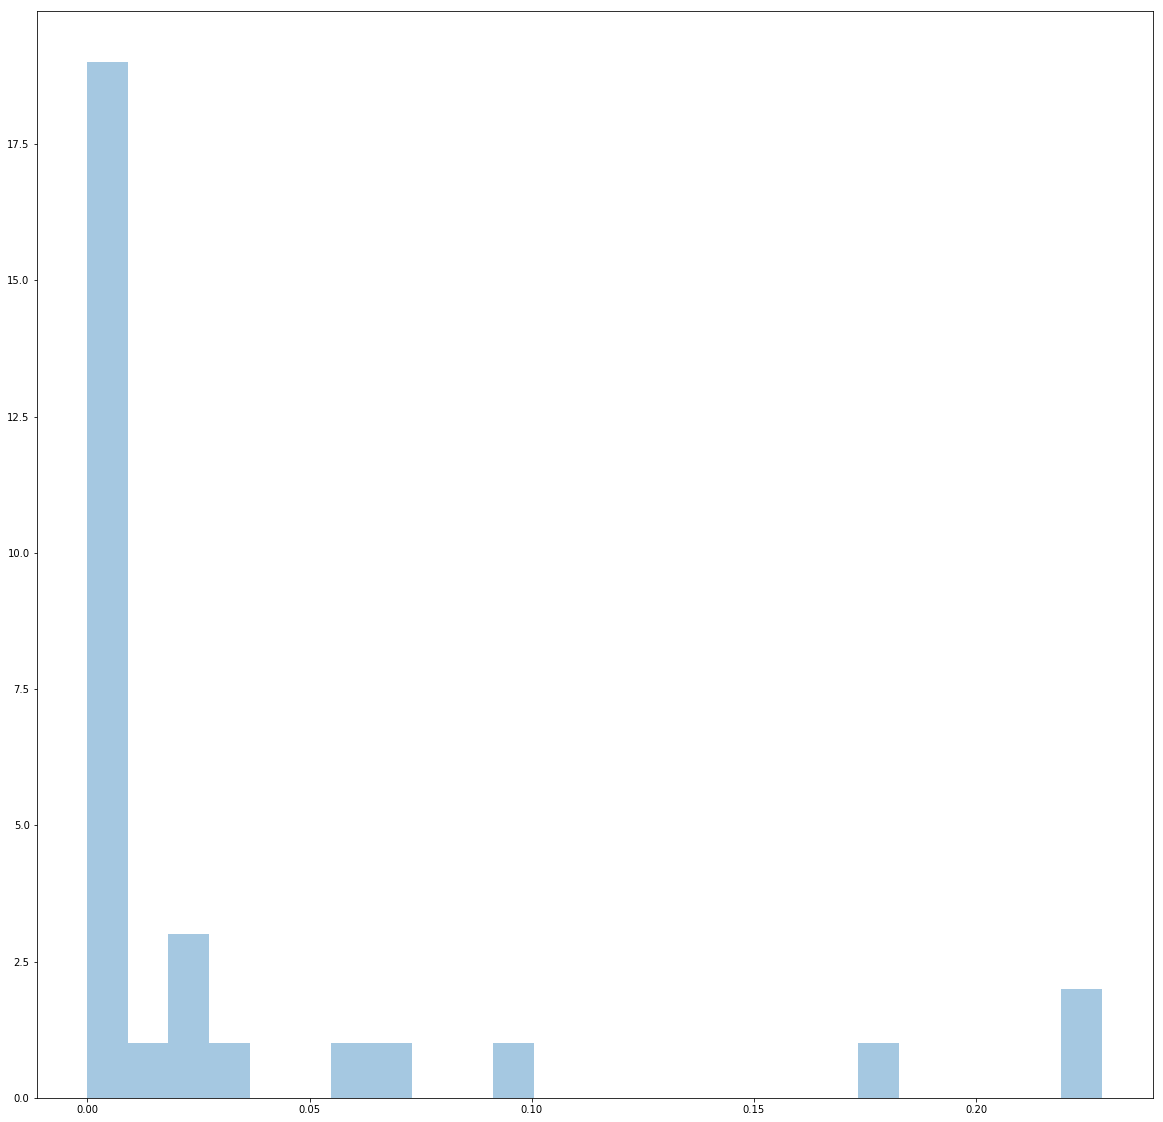

In [187]:
plt.figure(figsize = (20,20))
sns.distplot(data.isnull().mean(), bins = 25, kde = False)

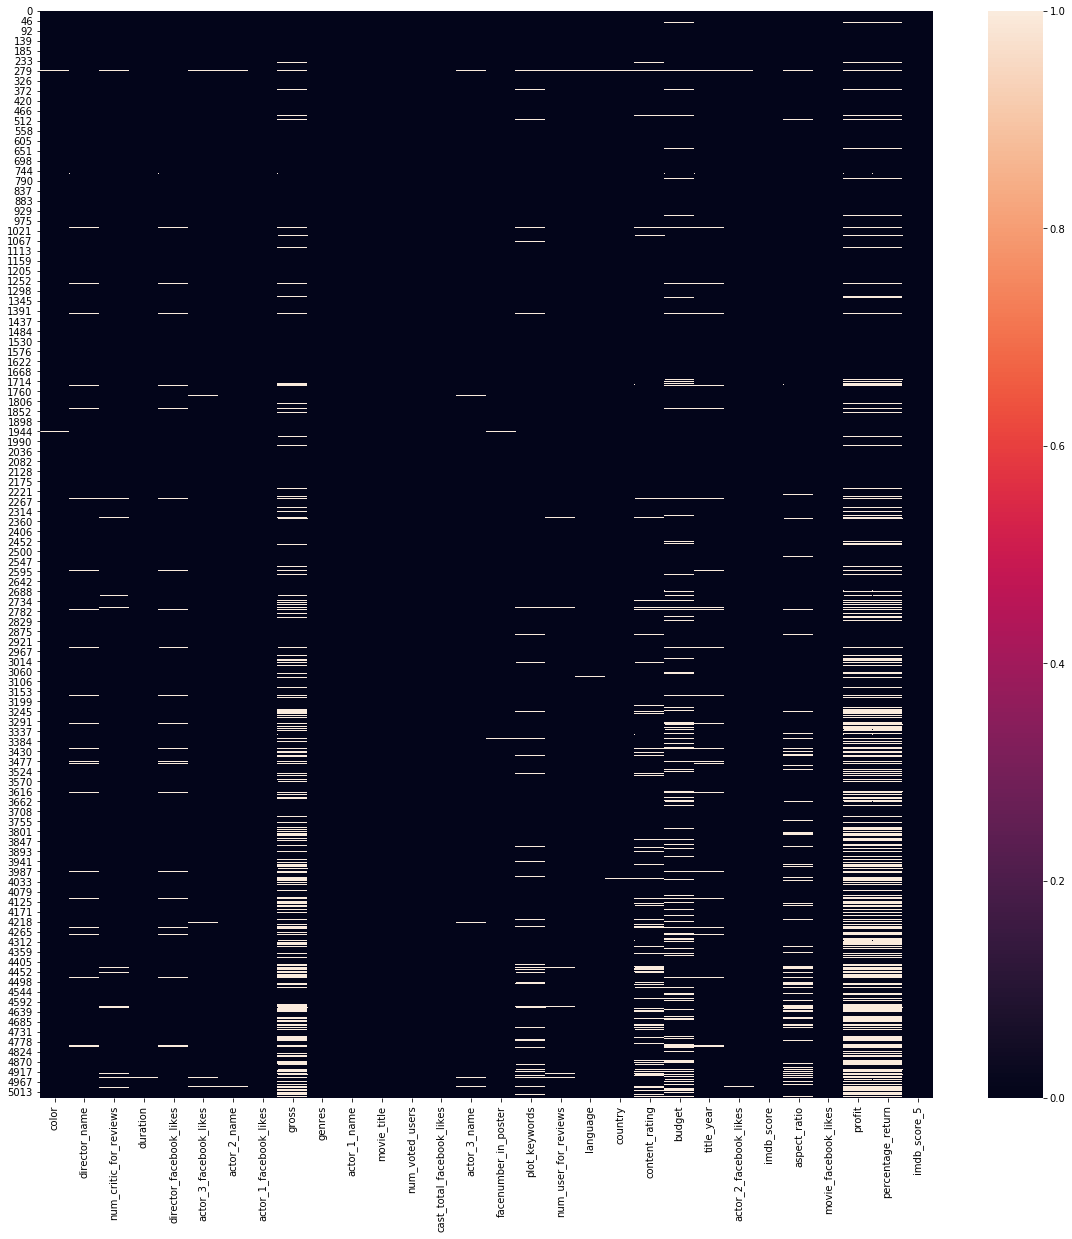

In [188]:
plt.figure(figsize = (20,20))
sns.heatmap(data.isnull())

TODO: word description over the plot

we will impute the null data from distribution.

In [189]:
data = data.apply(lambda x: x.apply(lambda y: x.dropna().sample(1).iloc[0] if pd.isnull(y) else y))

In [190]:
data.isnull().mean()

color                        0.0
director_name                0.0
num_critic_for_reviews       0.0
duration                     0.0
director_facebook_likes      0.0
actor_3_facebook_likes       0.0
actor_2_name                 0.0
actor_1_facebook_likes       0.0
gross                        0.0
genres                       0.0
actor_1_name                 0.0
movie_title                  0.0
num_voted_users              0.0
cast_total_facebook_likes    0.0
actor_3_name                 0.0
facenumber_in_poster         0.0
plot_keywords                0.0
num_user_for_reviews         0.0
language                     0.0
country                      0.0
content_rating               0.0
budget                       0.0
title_year                   0.0
actor_2_facebook_likes       0.0
imdb_score                   0.0
aspect_ratio                 0.0
movie_facebook_likes         0.0
profit                       0.0
percentage_return            0.0
imdb_score_5                 0.0
dtype: flo

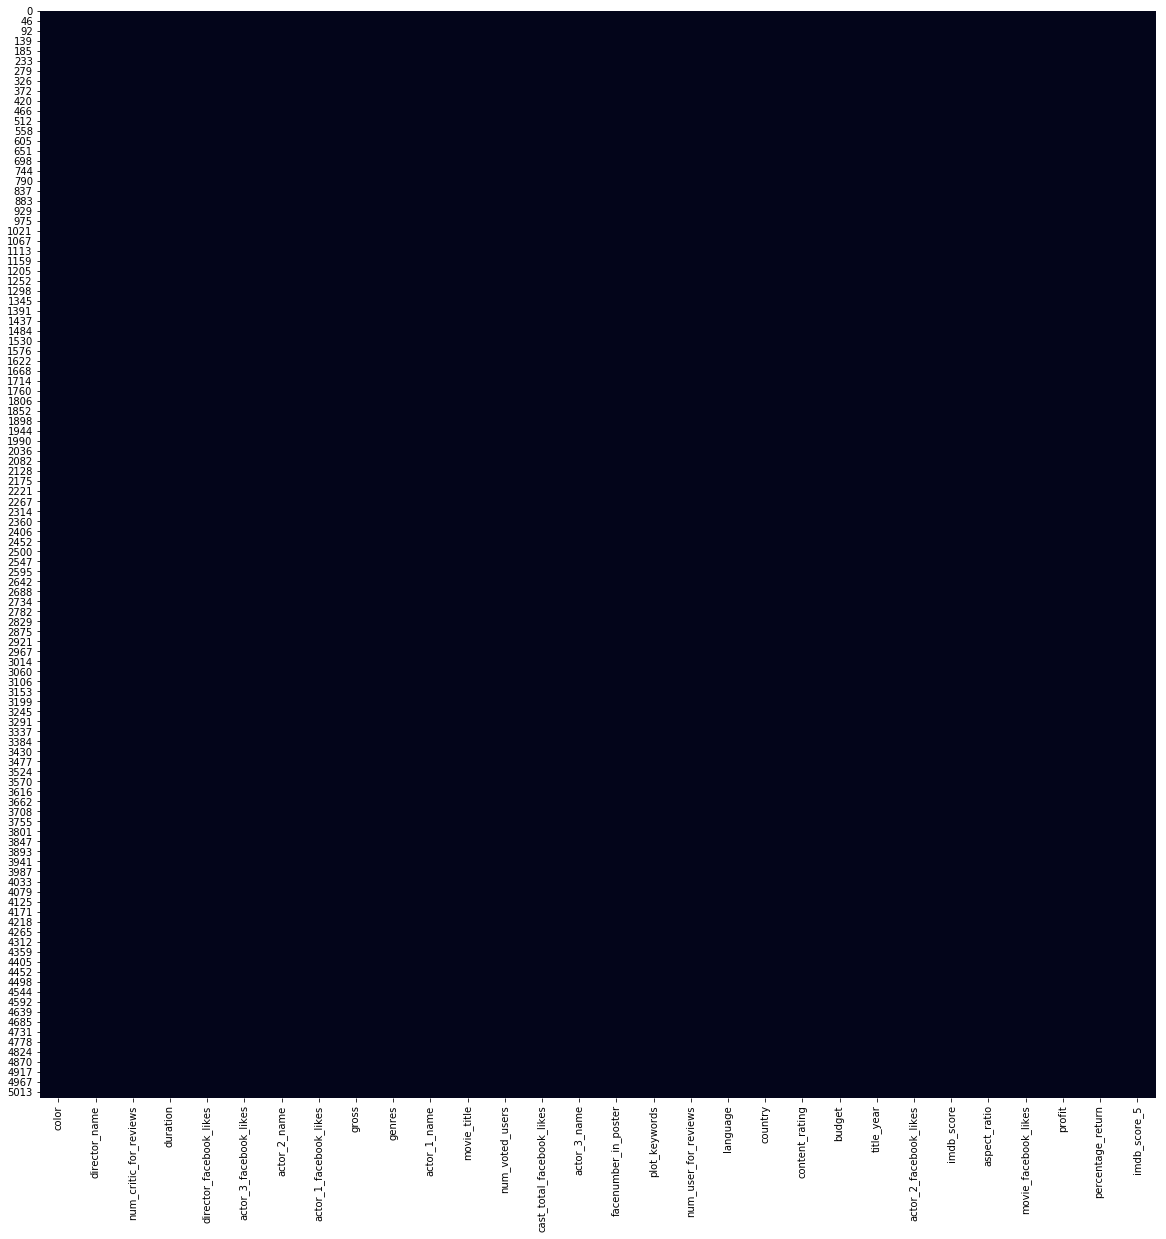

In [191]:
plt.figure(figsize = (20,20))
sns.heatmap(data.isnull(), cbar=False)

TODO: word description over the plot

In [192]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'profit', 'percentage_return',
       'imdb_score_5'],
      dtype='object')

# 4 Analysis & Exploration

## 4.1: Histogram of Movie Released

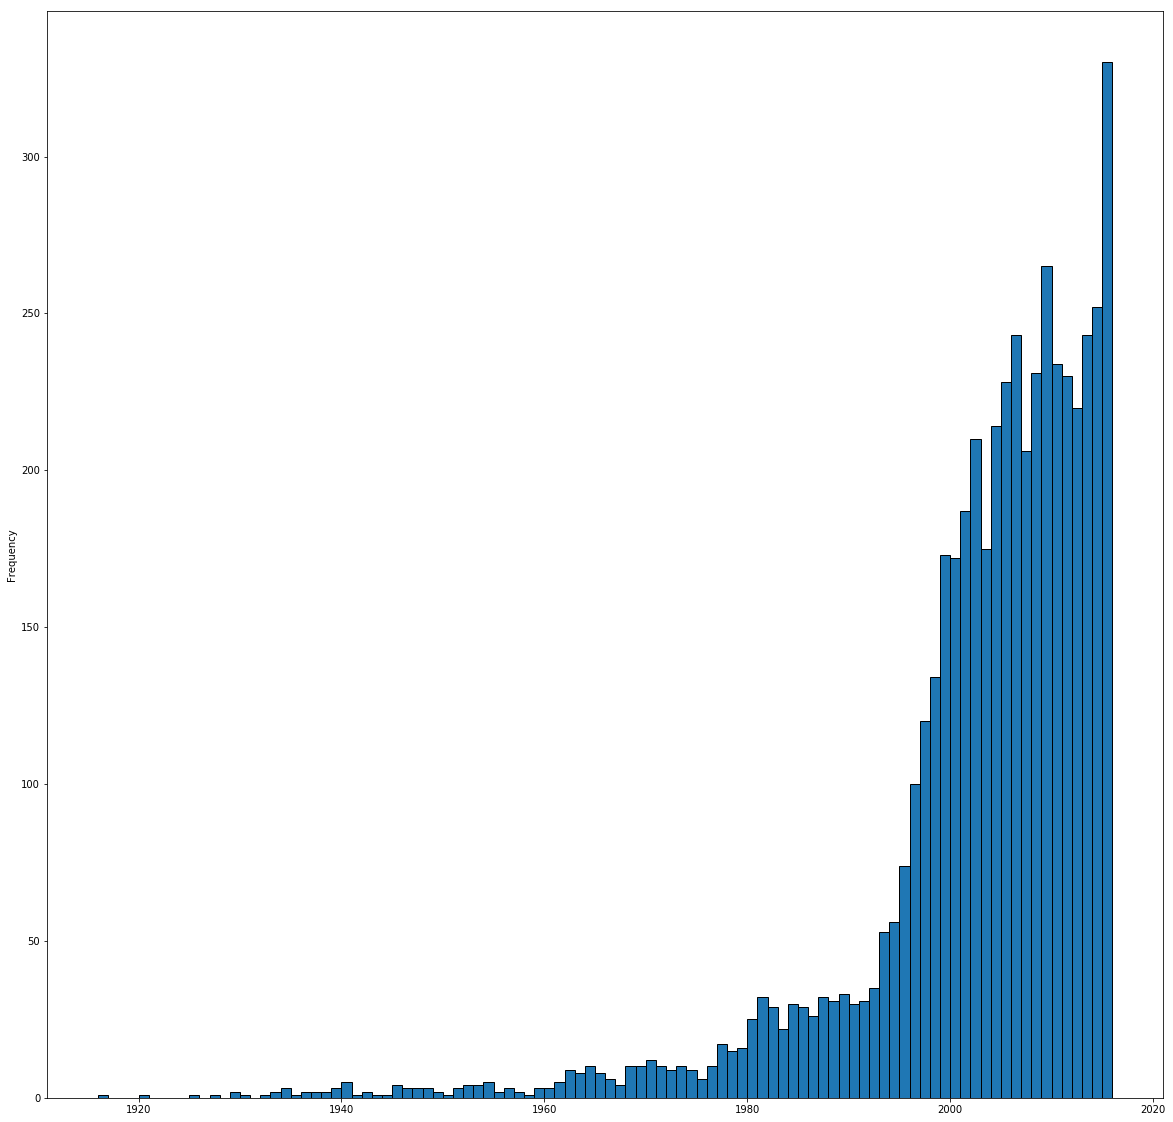

In [193]:
plt.figure(figsize = (20,20))
data.title_year.plot(kind = 'hist', bins = int(data.title_year.max() - data.title_year.min()), edgecolor='black')

#### Plot Description
From the graph, we noticed that most movies in the dataset were produced after 1980s. And the movies on the IMDB dataset increased dramatically between 1990s and 2000s. 

## 4.2 Top 200 Movies based on Budget

In [194]:
Top_200_profit = data[data.index.isin(data['profit'].sort_values(ascending = False)[:200].index)]

In [195]:
Top_200_profit['profit'] = Top_200_profit['profit'] / 1000000
Top_200_profit['budget'] = Top_200_profit['budget'] / 1000000

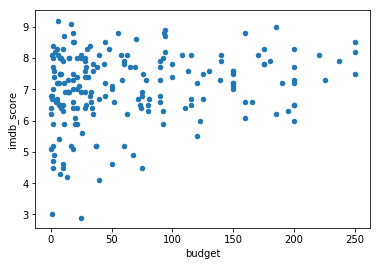

In [196]:
Top_200_profit.plot.scatter(x = 'budget', y = 'imdb_score')

TODO: word description over the plot

TODO: Summery over 4.2

## 4.3 Top 200 Movies based on Percentage Return

In [197]:
Top_200_percentage_return = data[data.index.isin(data['percentage_return']\
                                                .sort_values(ascending = False)[0:200].index)]

In [198]:
score = Top_200_percentage_return['imdb_score']
retur = Top_200_percentage_return['percentage_return']
frame = { 'score': score, 'return': retur }
score_vs_return_df = pd.DataFrame(frame)

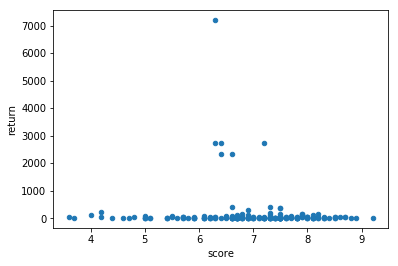

In [199]:
score_vs_return_df.plot.scatter(x ='score', y = 'return')

#### Plot Descrption
The plot contains 200 moveis with top percentage_return in the datasets

In [200]:
Top_200_percentage_return = Top_200_percentage_return.sort_values('percentage_return', ascending = False)[3:]

In [201]:
score = Top_200_percentage_return['imdb_score']
retur = Top_200_percentage_return['percentage_return']
frame = { 'score': score, 'return': retur }
score_vs_return_df = pd.DataFrame(frame)

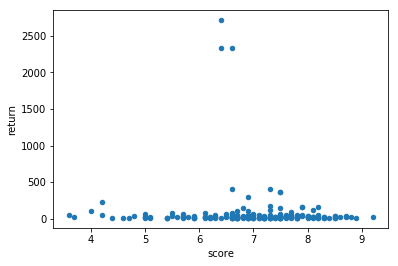

In [202]:
score_vs_return_df.plot.scatter(x = 'score', y = 'return')

#### Plot Description
We dropped the outliar from the previous plot

In [203]:
Top_200_percentage_return = Top_200_percentage_return[Top_200_percentage_return['percentage_return'] <= 100]


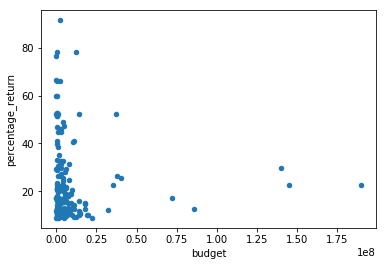

In [204]:
Top_200_percentage_return.plot.scatter(x = 'budget', y = 'percentage_return')

#### Plot Description
The percentage_return is high for Low Budget Films and decreases as the budget of the movie increases.

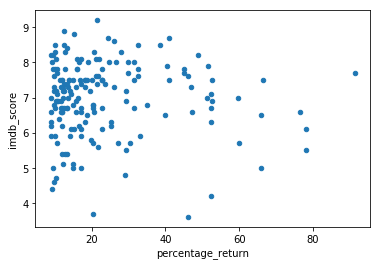

In [205]:
Top_200_percentage_return.plot.scatter(x = 'percentage_return', y = 'imdb_score')

#### Plot Description
Most of the movies have the percentage_return rate around 20% and the IMDB scores vary a lot as the percentage_return increase. It doesn't seem to have a strong corelation between the Percentage_return and imdb_score

#### Summary
In this part, we are interested if there exists a relationship between percentage_return and imdb_score. So we select 200 movies with the highest percentage_return from the dataset and plot a scatter plot(percentage_return v.s. IMDB_score) and drop the outliar(700% percentage_return). After that, we notice most movies' percentage_returns are below 100%. So we narrow down the scope further and analyze moveis with percentage_return less than 100%. It seems that there is a negtive correlation between percentage return and IMDB socre.

## 4.4 directors with highest average IMDB score
we will rank directors based on their facebook likes

In [206]:
director_avg = data.groupby('director_name')['imdb_score', 'director_facebook_likes'].mean()

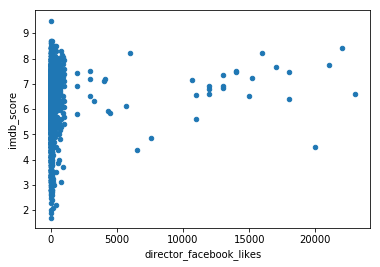

In [207]:
director_avg.plot.scatter(x = 'director_facebook_likes', y = 'imdb_score')

TODO: Divide them into two group, likes >= than 2000, or < than 2000

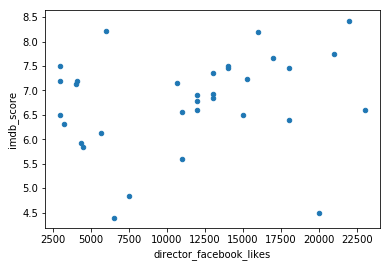

In [208]:
director_avg[director_avg['director_facebook_likes'] > 2000].plot.scatter(x = 'director_facebook_likes', y = 'imdb_score')

TODO: plot analysis

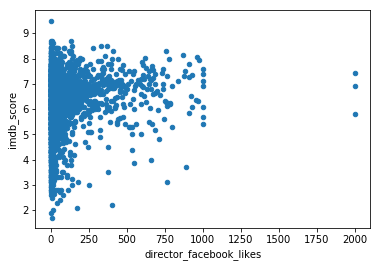

In [209]:
director_avg[director_avg['director_facebook_likes'] <= 2000]\
.plot.scatter(x = 'director_facebook_likes', y = 'imdb_score')

In [210]:
# Sample the dataset

In [211]:
director_avg_2000 = director_avg[director_avg['director_facebook_likes'] <= 2000].sample(100)

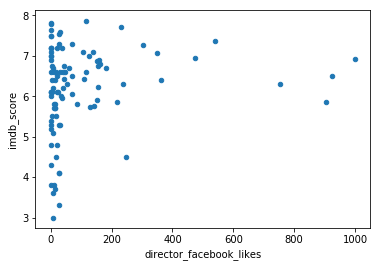

In [212]:
director_avg_2000.plot.scatter(x = 'director_facebook_likes', y = 'imdb_score')

TODO: word description over the plot

Summery of 4.4 Movie with extremely high Facebook likes tend to have higher imdb score. But the score for movie with low Facebook likes vary in a very wide range.

# 4.5 Country

              country
USA              3776
UK                443
France            155
Canada            124
Germany            97
Australia          55
India              34
Spain              33
China              28
Italy              23
Japan              22
Hong Kong          17
Mexico             17
New Zealand        15
South Korea        14
Ireland            12
Denmark            11
Russia             11
South Africa        8
Norway              8
Brazil              8


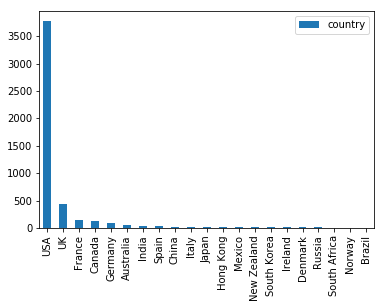

In [213]:
country_number_df = pd.DataFrame(data.country.value_counts())
country_number_df = country_number_df.drop(country_number_df[country_number_df.country < 8].index)
print(country_number_df)
country_number_df.plot(kind = 'bar')

Maybe drop countries with movies < 8?

In [214]:
temp = data.country.apply(lambda x: 'United Kingdom'if x == 'UK'\
                          else ('Russia' if x == 'Soviet Union' else \
                          ('Germany' if x == 'West Germany' else x))).tolist()

In [215]:
import country_converter as coco
some_names = ['United Rep. of Tanzania', 'DE', 'Cape Verde', '788', 'Burma', 'COG',
              'Iran (Islamic Republic of)', 'Korea, Republic of',
              "Dem. People's Rep. of Korea"]
Continent = coco.convert(names=temp, to='Continent')

In [216]:
data['continent'] = pd.Series(Continent, index = data.index)

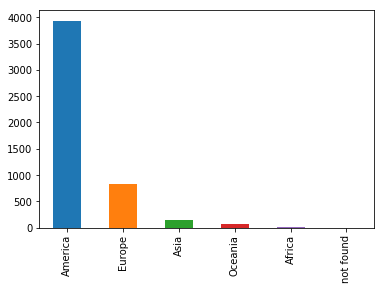

In [217]:
data.continent.value_counts().plot(kind = 'bar')

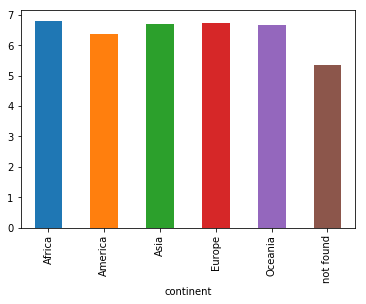

In [218]:
data.groupby('continent')['imdb_score'].mean().plot(kind = 'bar')

TODO: observation (country/continent not correlated)

## 4.6 Number of Reviews

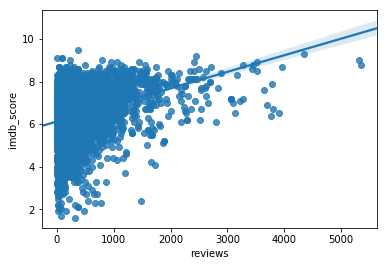

In [219]:
total_reviews = pd.DataFrame(columns=['reviews', 'imdb_score'])
total_reviews['reviews'] = data['num_user_for_reviews'] + data['num_critic_for_reviews']
total_reviews['imdb_score'] = data['imdb_score']

sns.regplot(y='imdb_score', x='reviews', data=total_reviews)

### Under 1000 sample

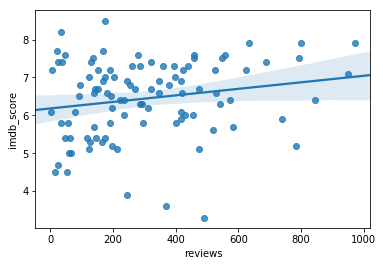

In [220]:
reviews_under_1000 = total_reviews[total_reviews['reviews'] < 1000].sample(100)
sns.regplot(y='imdb_score', x='reviews', data=reviews_under_1000)

### 1000 & up sample

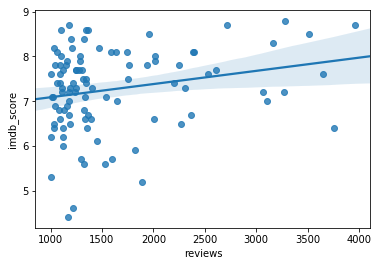

In [221]:
reviews_1000_up = total_reviews[total_reviews['reviews'] >= 1000].sample(100)
sns.regplot(y='imdb_score', x='reviews', data=reviews_1000_up)

## 4.7 Duration

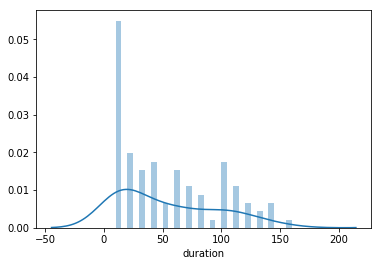

In [222]:
duration = data.duration.value_counts(sort=False).round(-1)
duration = duration[duration != 0]
sns.distplot(duration, bins=30)

# 4.8 content_rating

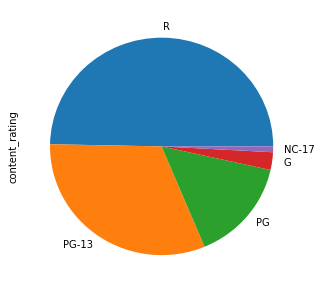

In [223]:
data.content_rating.value_counts().plot.pie(figsize=(5,5))

# 4.9 language

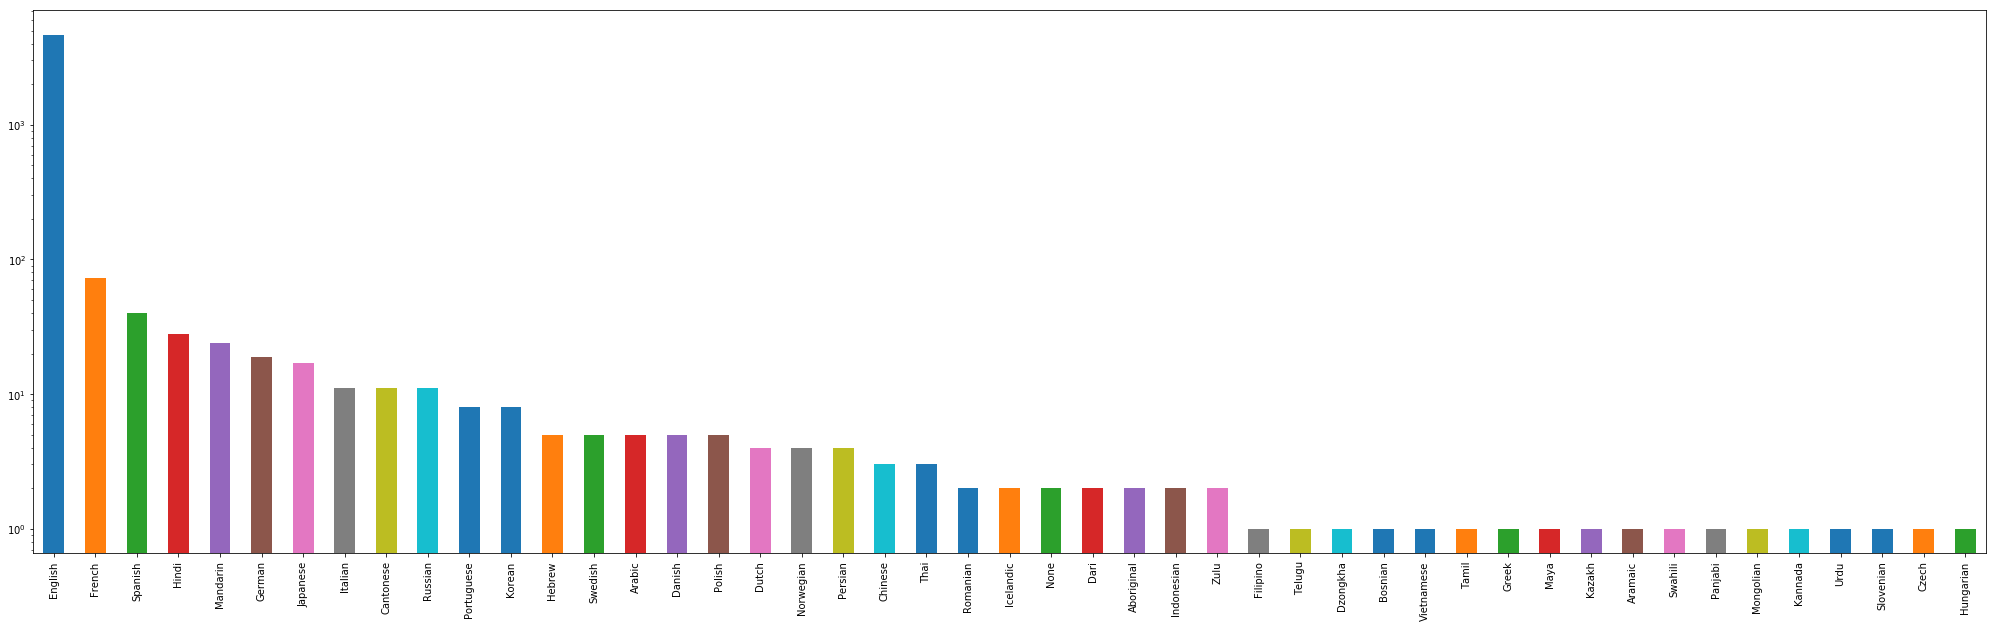

In [224]:
data.language.value_counts().plot(kind = 'bar', figsize=(35,10), logy=True)

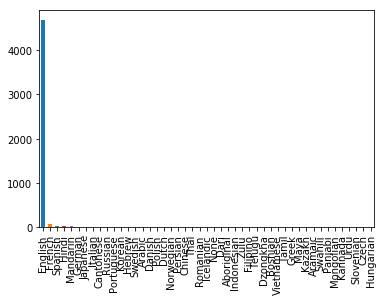

In [225]:
###TODO###
# FROILAN'S PART will finish before tues

data['language'].value_counts().plot(kind = 'bar')





#### Plot Description
The plot demonstrates that most of the movies are in English

#### Summary
We don't further analyze the relationship between language and IMDB scores because English moveis are dominant in this dataset and it does not yield useful results. 

# 4.10 color

In [226]:
data['color'].value_counts()

Color               4790
 Black and White     208
Name: color, dtype: int64

In [227]:
#95.85 % of the films were colored.
#less than 5 % is Black and White.

In [228]:
(data['color'].value_counts()/data['color'].count())*100

Color               95.838335
 Black and White     4.161665
Name: color, dtype: float64

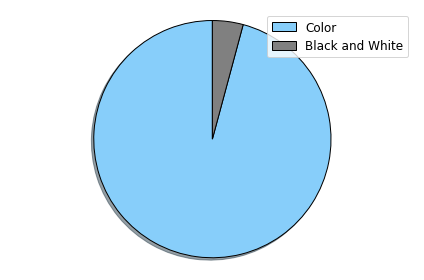

In [229]:
labels = 'Color','Black and White'
sizes =[4789, 209]
colors = ['lightskyblue','gray']
patches, texts = plt.pie(sizes,colors=colors,shadow=True,startangle=90,
wedgeprops={"edgecolor":"0", 'linewidth':1,
            'linestyle':'solid','antialiased':True })
plt.legend(patches,labels,loc="best",fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [230]:
# If we focus on the films created in Black and White,
# we can see that the oldest one was made on 1916 and the newest on 2015

In [231]:
black_white = data[data['color']==' Black and White']
black_white.sort_values('title_year')



,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,percentage_return,imdb_score_5,continent
4810,Black and White,D.W. Griffith,69.0,123.0,204.0,9.0,Mae Marsh,436.0,8406264.0,Drama|History|War,...,385907.0,1916.0,22.0,8.0,1.33,691,-672499.0,-0.751900,5,America
4958,Black and White,Harry F. Millarde,1.0,110.0,0.0,0.0,Johnnie Walker,2.0,3000000.0,Crime|Drama,...,100000.0,1920.0,2.0,4.8,1.33,0,2900000.0,29.000000,3,America
4885,Black and White,King Vidor,48.0,151.0,54.0,6.0,Renée Adorée,81.0,64459316.0,Drama|Romance|War,...,245000.0,1925.0,12.0,8.3,1.33,226,-11701351.0,20.756273,5,America
2734,Black and White,Fritz Lang,260.0,145.0,756.0,18.0,Gustav Fröhlich,136.0,26435.0,Drama|Sci-Fi,...,6000000.0,1927.0,23.0,8.3,1.33,12000,-5973565.0,-0.995594,5,Europe
4664,Black and White,Georg Wilhelm Pabst,71.0,110.0,21.0,3.0,Francis Lederer,426.0,9950.0,Crime|Drama|Romance,...,23000000.0,1929.0,20.0,8.0,1.33,926,52360285.0,-0.321224,5,Europe
4812,Black and White,Harry Beaumont,36.0,100.0,4.0,4.0,Bessie Love,77.0,2808000.0,Musical|Romance,...,379000.0,1929.0,28.0,6.3,1.37,167,2429000.0,6.408971,4,America
3960,Black and White,Howard Hughes,35.0,96.0,177.0,4.0,Marian Marsh,431.0,48092846.0,Drama|War,...,3950000.0,1930.0,12.0,7.8,1.20,279,23541700.0,5.027318,4,America
3755,Black and White,Frank Borzage,42.0,79.0,57.0,99.0,Helen Hayes,998.0,418953.0,Drama|Romance|War,...,800000.0,1932.0,164.0,6.6,1.37,213,-4995352.0,-0.888421,4,America
4898,Black and White,Lowell Sherman,35.0,66.0,16.0,28.0,Gilbert Roland,418.0,706622.0,Comedy|Drama|History|Musical|Romance,...,200000.0,1933.0,85.0,6.5,1.37,328,1062898.0,1.539503,4,America
4786,Black and White,Lloyd Bacon,65.0,89.0,24.0,45.0,Dick Powell,610.0,2300000.0,Comedy|Musical|Romance,...,439000.0,1933.0,105.0,7.7,1.37,439,1861000.0,4.239180,4,America


# 4.11 genres

In [232]:
###TODO### parse into countvectorizor and analysisi it

# FROILAN'S PART will finish before tues 

len(data['genres'].value_counts())

914

Noticing that many movies contain multiple genres type. But we are more interesting the main genres so we want to re-categrize

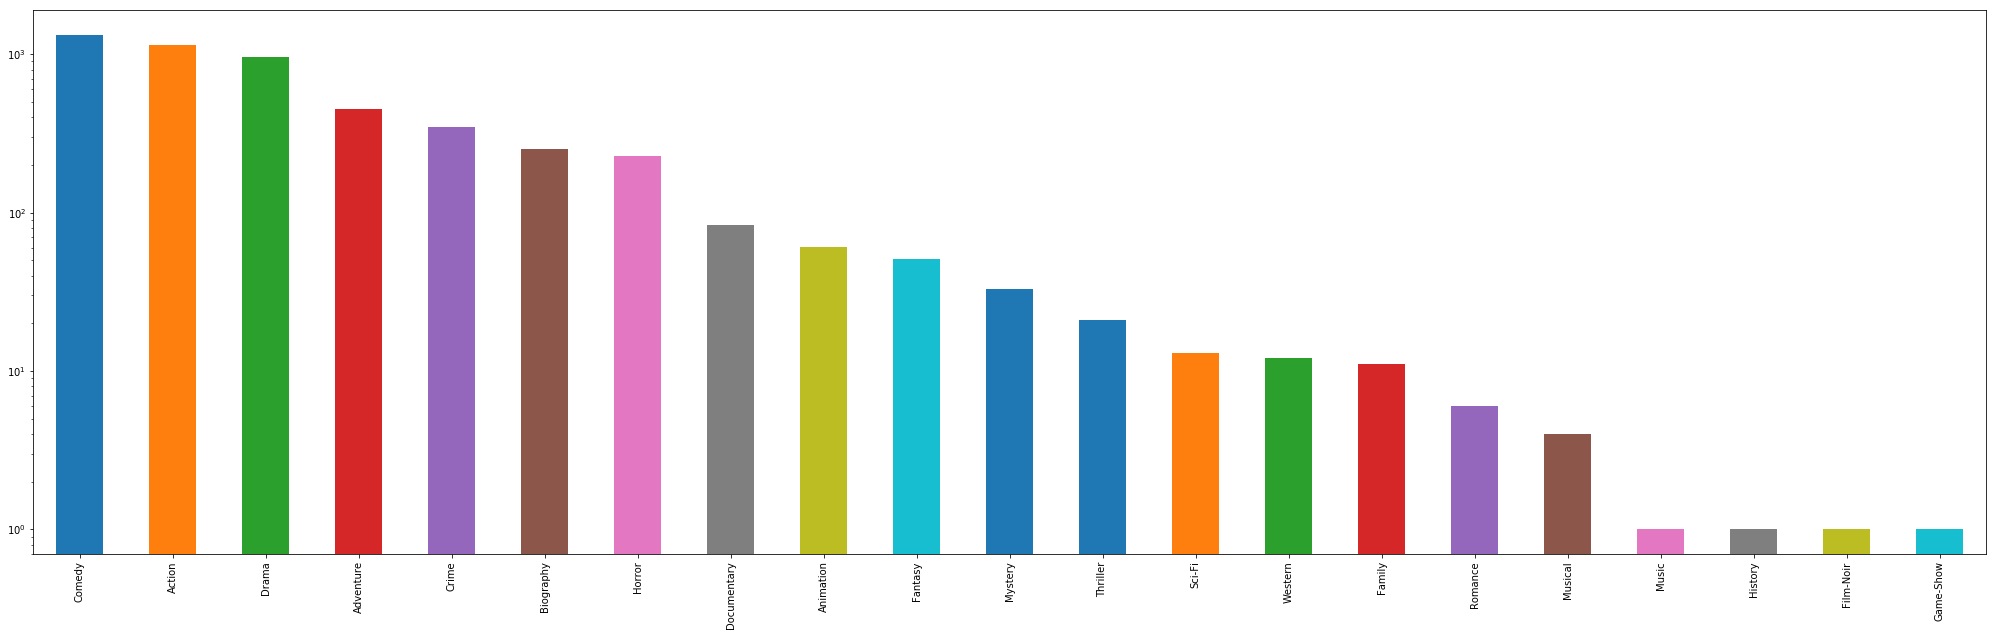

In [233]:
primary_genres = []
sep = '|'
for name in data['genres']:
    name = name.split(sep,1)[0]
    primary_genres.append(name)
d={'genres':primary_genres,'imdb_score':data['imdb_score']}
genres_df = pd.DataFrame(data=d)
genres_df.genres.value_counts().plot(kind = 'bar', figsize=(35,10), logy=True)

In [234]:
genres_df = genres_df[genres_df['imdb_score']>7]

# 4.11 Other features
We have explored all features most correlated with sale imdb score.
How about features haven't analyze yet?

In [235]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

We are going to use PCA to analyze the reamaining data at once. It's difficult to throw categorical data into the PCA anaylsis so we ignore them here.

In [236]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes', 'profit', 'percentage_return',
       'imdb_score_5', 'continent'],
      dtype='object')

In [238]:
Other_df = data[['actor_3_facebook_likes','actor_1_facebook_likes','gross',
                'num_voted_users','cast_total_facebook_likes','facenumber_in_poster',
                'title_year','actor_2_facebook_likes','aspect_ratio','movie_facebook_likes','profit','imdb_score']]

In [239]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(Other_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component'])
rating = Other_df[['imdb_score']]
principalDf.reset_index(drop=True,inplace=True)
rating.reset_index(drop=True,inplace=True)
finalDf = pd.concat([principalDf, rating], axis = 1)

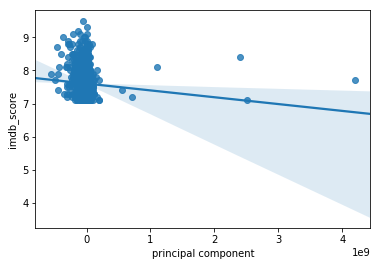

In [240]:
finalDf_greater_7= finalDf[finalDf['imdb_score']>7]
sns.regplot(y='imdb_score', x='principal component', data=finalDf_greater_7)

In [241]:
pca.explained_variance_ratio_

array([0.91021136])

After using PDA to project all the numeric data into one feature, we noticed that the reduced dataframe contains the 90% information of the oreginal dataframe. We are interested if the reduced column can be used to predict the imdb socre but the regression plot suggest that there might not be a good linaer relationship between them.

# 5 Machine Learning: Classification & Feature Imporatance
we will use random forest (parameter not tuned) with our classfication algorithm

In [ ]:
data.columns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['color', 'num_critic_for_reviews', 'duration', 'director_facebook_likes',\
        'actor_3_facebook_likes', 'actor_1_facebook_likes', 'movie_title',\
         'facenumber_in_poster', 'genres','plot_keywords', 'language', 'content_rating', 'title_year'\
        , 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes', 'profit',\
        'profit', 'continent']]
y = data['imdb_score_5']
X['genres'] = X['genres'].str.replace('|', ',').fillna(' ')
X['movie_title'] = X['movie_title'].str.replace(' ',',').fillna(' ')
X['plot_keywords'] = X['plot_keywords'].str.replace(' ',',').fillna(' ')

In [ ]:
###TODO### What column did not select, why?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator

# Changed the base classes here, see Point 3
class PassthroughTransformer(BaseEstimator, TransformerMixin):

    # I corrected the `fit()` method here, it should take X, y as input
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        self.X = X
        return X

    # I have corrected the output here, See point 2
    def get_feature_names(self):
        return self.X.columns.tolist()

In [ ]:
catagorical_feat = ['color', 'language', 'content_rating', 'aspect_ratio', 'continent']
remainder_feat = list(set(X.columns).difference(set(catagorical_feat)).difference(['genres','movie_title','plot_keywords']))
preproc = ColumnTransformer(transformers=[('catagorical', OneHotEncoder(handle_unknown='ignore'), catagorical_feat),\
                                            ('genres', CountVectorizer(), 'genres'),
                                         ('movie_title', CountVectorizer(), 'movie_title'),
                                         ('plot_keywords', CountVectorizer(), 'plot_keywords'),
                                         ('other', PassthroughTransformer(), remainder_feat)])
clf = RandomForestClassifier()
pl = Pipeline(steps=[('preprocessor', preproc),
            ('clf', clf)
            ])

In [ ]:
pl.fit(X_train,y_train)

In [ ]:
# Accuracy is

In [ ]:
pl.score(X_test,y_test)

In [ ]:
# Our pipeline works fine 

In [ ]:
pl.fit(X,y)

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [ ]:
for i in np.array(pl.steps[0][1].get_feature_names())[indices[:100]]:
    print(i)

TODO: Observation over above results

# 7 Discussion

Through the analysing of the Dataset, “IMDB Exploratory Data Analysis Project” we were able to break down the movie data into many different categories that can potentially be a reason behind the reasoning for a specific movie rating. After reviewing the IMDB dataset and extracting information from it we were able to come up with an abundant number of different categories which could possibly explain the rating behind movies. Some of these categories consisted of the effect of movie advertising colors on posters or billboards, the director of the movie, the number of critic reviews, the duration of the movie, the number of Facebook likes, movie genre, the language of the movie, what country the movie was produced in, and the budget for the production of the movie. After extracting these different categories from the dataset we plotted all the data in bar charts, histograms, or scatterplots in order to get a better visualization of the data and try to find a positive correlation with these different categories and the rating a movie received.

# 8 Final Conclusion

TODO